# WORLD HAPPINESS REPORT

The World Happiness Report is a landmark survey of the state of global happiness.The happiness scores and rankings use data from the Gallup World Poll. In this task we have following column: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. the highest rank in the overall happiness is depends on above six columns.

# importing required libraries

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [313]:
data=pd.read_csv("happiness.csv")
del data['Standard Error']
data.head(20)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [314]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [315]:
data.shape

(158, 11)

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [317]:
data.describe()
#basic learning on my dataset

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [318]:
# changing the names of columns that include spaces between words to one word name
# This will make it easier for me to work on my data.
data= data.rename({'Happiness Rank':'happinessRank'}, axis='columns')
data= data.rename({'Happiness Score':'happinessScore'}, axis='columns')
data= data.rename({'Economy (GDP per Capita)':'economy'}, axis='columns')
data= data.rename({'Health (Life Expectancy)':'health'}, axis='columns')
data= data.rename({'Trust (Government Corruption)':'trust'}, axis='columns')
data= data.rename({'Dystopia Residual':'DystopiaResidual'}, axis='columns')
data.head()

,Country,Region,happinessRank,happinessScore,economy,Family,health,Freedom,trust,Generosity,DystopiaResidual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [319]:
regions=data.Region.unique()
for reg in regions:
    print(reg)

Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


In [320]:
region_counts=data['Region'].value_counts()
print(region_counts)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


In [321]:
region_values=region_counts.values
region_index=region_counts.index



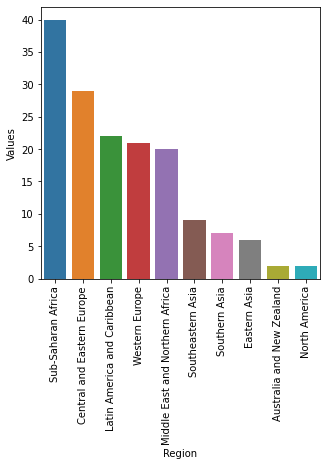

In [322]:
plt.figure(figsize=(5,5))
sns.barplot(x=region_index,y=region_values)
plt.xlabel('Region')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

as we see most of the countries are from sub-saharan africa and there are few countries from north america

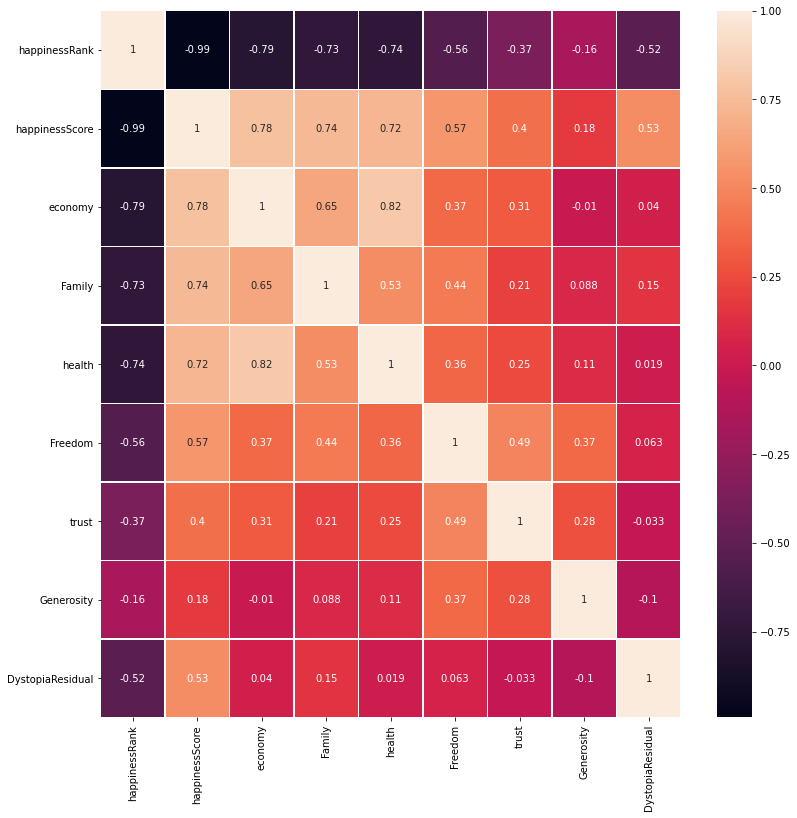

In [323]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True,linewidth=.5)
plt.show()

From the above charts, we can obtain the following conclusions:

The Happiness Score is highly related with the Economy(GDP per Capita), Family and Healthy (Life Expectancy).
The Happines Score is not related at all with the Generosity Variable.
So, as a first conclusion, we could say that the Happiest Countries will be the ones with higher GDP per capita, Family and healthy(Life Expectancy).

lets check the effect of economy on happiness score

In [324]:
dataA=data[["economy","happinessScore"]]
dataA

,economy,happinessScore
0,1.39651,7.587
1,1.30232,7.561
2,1.32548,7.527
3,1.45900,7.522
4,1.32629,7.427
...,...,...
153,0.22208,3.465
154,0.28665,3.340
155,0.66320,3.006
156,0.01530,2.905


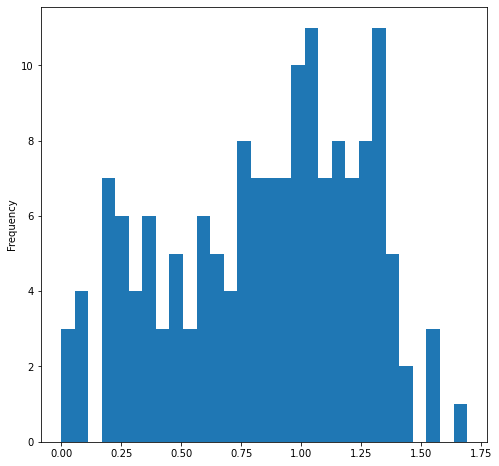

In [325]:
data.economy.plot(kind='hist',bins=30,figsize=(8,8))

checking health influence on happiness score

In [326]:
dataB=data[["health","happinessScore"]]

In [327]:
dataB

,health,happinessScore
0,0.94143,7.587
1,0.94784,7.561
2,0.87464,7.527
3,0.88521,7.522
4,0.90563,7.427
...,...,...
153,0.42864,3.465
154,0.31910,3.340
155,0.72193,3.006
156,0.22396,2.905


In [328]:
data.happinessScore.mean()

5.3757341772151905

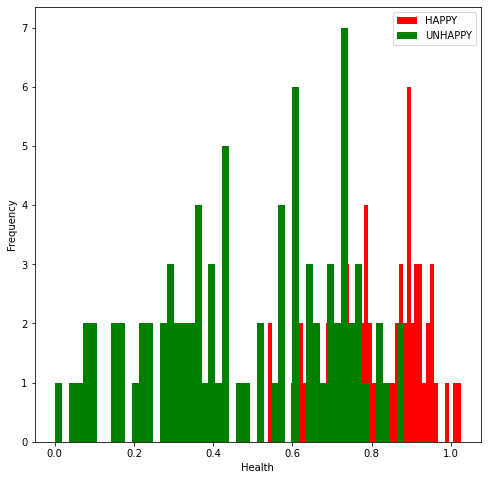

In [329]:
#taking hapinessScore mean =5.4
HAPPY=data[data["happinessScore"]>5.4]
UNHAPPY=data[data["happinessScore"]<5.4]


HAPPY.health.plot(kind='hist',bins=50,figsize=(8,8),color="red",label="HAPPY")
UNHAPPY.health.plot(kind='hist',bins=50,figsize=(8,8),color="green",label="UNHAPPY")

plt.xlabel('Health')
plt.legend()
plt.show()

as we saw above most of the HAPPY countries have the high health rate 

In [330]:
dataC=data[["Family","happinessScore"]]
dataC

,Family,happinessScore
0,1.34951,7.587
1,1.40223,7.561
2,1.36058,7.527
3,1.33095,7.522
4,1.32261,7.427
...,...,...
153,0.77370,3.465
154,0.35386,3.340
155,0.47489,3.006
156,0.41587,2.905


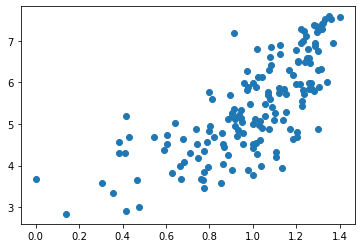

In [331]:
x= dataC.Family
y= dataC.happinessScore
plt.scatter(x, y, marker='o')

now freedom effect on hapinessScore

In [332]:
dataD=data[["Freedom","happinessScore"]]
dataD

,Freedom,happinessScore
0,0.66557,7.587
1,0.62877,7.561
2,0.64938,7.527
3,0.66973,7.522
4,0.63297,7.427
...,...,...
153,0.59201,3.465
154,0.48450,3.340
155,0.15684,3.006
156,0.11850,2.905


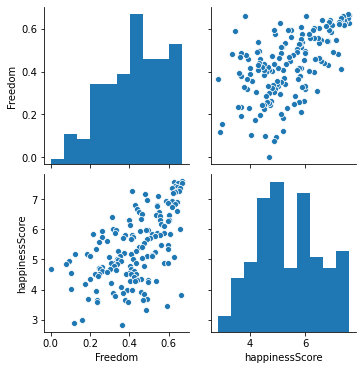

In [333]:
data_4=pd.concat([data.Freedom,data.happinessScore],axis=1)
sns.pairplot(data_4)
plt.show()


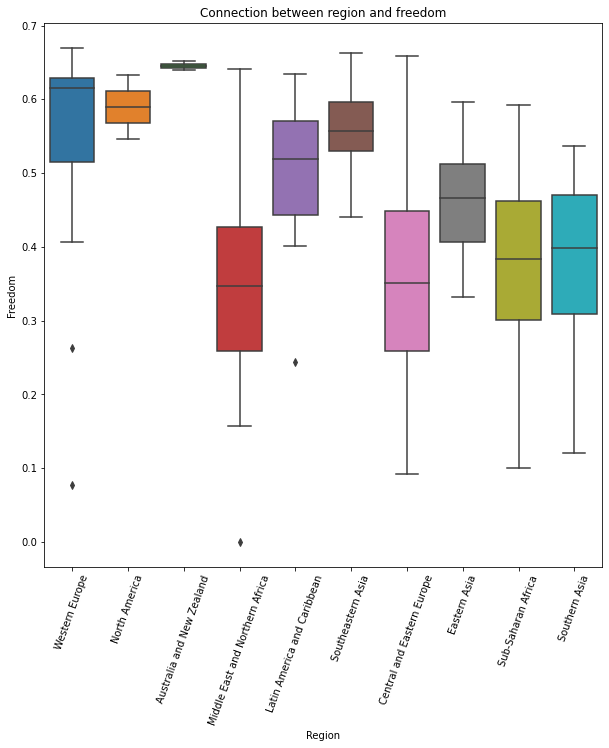

In [334]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Region", y="Freedom", data=data)
plt.xticks(rotation=70)
plt.title("Connection between region and freedom")
plt.show()

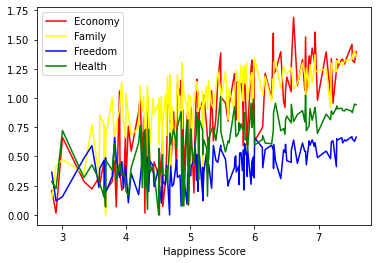

In [335]:

# checking the influence of the four features  on the happiness score (together):

plt.plot(data.happinessScore, data.economy, color = "red", label = "Economy")
plt.plot(data.happinessScore, data.Family, color = "yellow", label = "Family")
plt.plot(data.happinessScore, data.Freedom, color = "blue", label = "Freedom")
plt.plot(data.happinessScore, data.health, color = "green", label = "Health")

plt.legend()    
plt.xlabel('Happiness Score')           
plt.show()

In [336]:
dataE=data[["trust","happinessScore"]]
dataE

,trust,happinessScore
0,0.41978,7.587
1,0.14145,7.561
2,0.48357,7.527
3,0.36503,7.522
4,0.32957,7.427
...,...,...
153,0.55191,3.465
154,0.08010,3.340
155,0.18906,3.006
156,0.10062,2.905


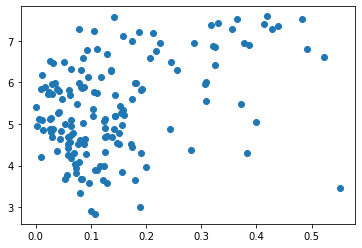

In [337]:
x= dataE.trust
y= dataE.happinessScore
plt.scatter(x, y) 

now see genorisity effect on happiness score
genorisity:-The willingness of people to contribute to others, and social support, which is the presence of someone who can be trusted in difficult times.



In [338]:
dataF= data[["Generosity","happinessScore"]]
dataF

,Generosity,happinessScore
0,0.29678,7.587
1,0.43630,7.561
2,0.34139,7.527
3,0.34699,7.522
4,0.45811,7.427
...,...,...
153,0.22628,3.465
154,0.18260,3.340
155,0.47179,3.006
156,0.19727,2.905


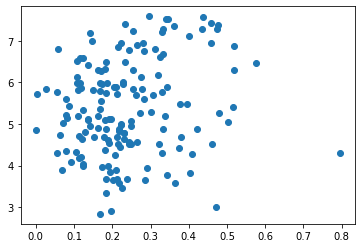

In [339]:
x= dataF.Generosity
y= dataF.happinessScore
plt.scatter(x, y)

f,ax1=plt.subplots(figszie=(12,12))


sns.pointplot(x="happinessScore",y="economy",data=data,color="red",alpha=0.8)
sns.pointplot(x="happinessScore",y="health",data=data,color="blue",alpha=0.8)
sns.pointplot(x="happinessScore",y="Family",data=data,color="green",alpha=0.8)
sns.pointplot(x="happinessScore",y="Freedom",data=data,color="yellow",alpha=0.8)
sns.pointplot(x="happinessScore",y="trust",data=data,color="black",alpha=0.8)
sns.pointplot(x="happinessScore",y="Generosity",data=data,color="pink",alpha=0.8)
plt.text(8,0.6,"Generosity",color= "pink",fontsize= 14)
plt.text(8,0.55,"Freedom",color= "yellow",fontsize= 14)
plt.text(8,0.50,"trust",color= "black",fontsize= 14)
plt.text(8,0.45,"Family",color= "green",fontsize= 14)
plt.text(8,0.40,"health",color= "blue",fontsize= 14)
plt.text(8,0.35,"economy",color= "red",fontsize= 14)
plt.yticks(rotation=90)
plt.xlabel("Happiness Score")
plt.grid()

plt.show()

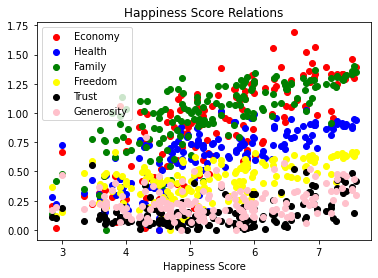

In [340]:
plt.scatter(data.happinessScore, data.economy, color = "red", label = "Economy")
plt.scatter(data.happinessScore, data.health, color = "blue", label = "Health")
plt.scatter(data.happinessScore, data.Family, color = "green", label = "Family")
plt.scatter(data.happinessScore, data.Freedom, color = "yellow", label = "Freedom")
plt.scatter(data.happinessScore, data.trust, color = "black", label = "Trust")
plt.scatter(data.happinessScore, data.Generosity, color = "pink", label = "Generosity")

plt.xlabel('Happiness Score') 
plt.legend()
plt.title('Happiness Score Relations')    

plt.show()

Dystopia Residual

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia.

The residuals, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2012-2014 life evaluations. These residuals combined with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values

In [341]:
dataG=data[["DystopiaResidual","happinessScore"]]
dataG

,DystopiaResidual,happinessScore
0,2.51738,7.587
1,2.70201,7.561
2,2.49204,7.527
3,2.46531,7.522
4,2.45176,7.427
...,...,...
153,0.67042,3.465
154,1.63328,3.340
155,0.32858,3.006
156,1.83302,2.905


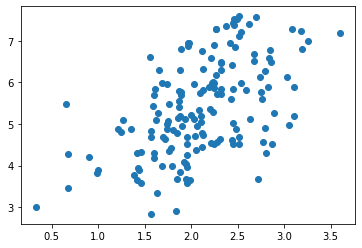

In [342]:
#the effect of dystoiaresidue effect on calculation
x= dataG.DystopiaResidual
y= dataG.happinessScore
plt.scatter(x, y)

# NOW finding the best fit model 

Linear regression

In [343]:

columns=['economy','health','Family','Freedom','trust','Generosity']
x=data[columns]
x.head()

,economy,health,Family,Freedom,trust,Generosity
0,1.39651,0.94143,1.34951,0.66557,0.41978,0.29678
1,1.30232,0.94784,1.40223,0.62877,0.14145,0.43630
2,1.32548,0.87464,1.36058,0.64938,0.48357,0.34139
3,1.45900,0.88521,1.33095,0.66973,0.36503,0.34699
4,1.32629,0.90563,1.32261,0.63297,0.32957,0.45811


In [344]:
type(x)

pandas.core.frame.DataFrame

In [345]:
x.shape

(158, 6)

In [346]:
y=data.happinessScore

In [347]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: happinessScore, dtype: float64

In [348]:
x.head()

,economy,health,Family,Freedom,trust,Generosity
0,1.39651,0.94143,1.34951,0.66557,0.41978,0.29678
1,1.30232,0.94784,1.40223,0.62877,0.14145,0.43630
2,1.32548,0.87464,1.36058,0.64938,0.48357,0.34139
3,1.45900,0.88521,1.33095,0.66973,0.36503,0.34699
4,1.32629,0.90563,1.32261,0.63297,0.32957,0.45811


In [349]:
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(158,)

In [350]:
y.shape

(158,)

In [351]:

x.shape

(158, 6)

In [352]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 6)
(40, 6)
(118,)
(40,)


In [353]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [354]:
lr.intercept_

1.9038373276181204

In [355]:
lr.coef_

array([0.91700074, 0.8475578 , 1.47987004, 1.16795302, 0.79820947,
       0.31334463])

In [356]:

list(zip(columns, lr.coef_))

[('economy', 0.9170007398406588),
 ('health', 0.8475578015711391),
 ('Family', 1.4798700427965308),
 ('Freedom', 1.1679530175084698),
 ('trust', 0.7982094689747027),
 ('Generosity', 0.31334462624898346)]

In [357]:
pred=lr.predict(x_test)
print(pred)
print(y_test)
print("test:")
print(lr.score(x_test,y_test))
print("train:")
print(lr.score(x_train,y_train))

[6.01322426 4.8064717  6.64883301 5.50447251 4.7247919  6.70460232
 5.51865794 6.24588827 6.0492556  4.88501111 4.64829672 5.35609479
 4.05979345 5.10242779 5.92858431 5.61408601 5.51389721 5.84756023
 4.93730821 4.51068742 6.1962786  6.43089962 4.10528302 6.94429123
 4.66448774 6.32811851 7.03050338 5.62567677 4.14434224 4.62040274
 4.59076675 3.0036518  4.25897797 5.97504551 5.20055239 5.28119298
 4.49632739 5.79128046 6.14465039 3.36784243]
29     6.574
107    4.715
14     7.119
81     5.192
124    4.419
19     6.901
73     5.399
11     7.226
40     6.168
95     4.949
100    4.867
92     5.007
108    4.694
94     4.959
58     5.813
88     5.098
42     6.123
53     5.855
51     5.889
145    3.781
59     5.791
35     6.329
143    3.845
5      7.406
126    4.350
31     6.485
16     6.946
78     5.253
118    4.518
91     5.013
120    4.514
156    2.905
135    4.077
44     5.995
127    4.332
85     5.124
77     5.268
103    4.800
33     6.455
152    3.575
Name: happinessScore, dtype: flo

In [358]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.35255337515377716
Mean squared error: 0.20031478592333304
Root mean squared Error: 0.4475653984875652


In [359]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8230133507627284


now trying to undefit the model by using cross validation for linear regression model

In [360]:
# The high score (99.9%) I got before could be result in overfitting, which we’re actually trying to avoid! 
# This is where cross validation comes in use.

In [361]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x, y, cv=10)
print(scores)
print("scores mean:", scores.mean())

[-27.24247263  -7.05216824  -5.33227325 -41.14880705 -10.14698545
 -55.74040203 -47.37686991 -25.34431147 -23.31397377  -6.01067022]
scores mean: -24.870893403714195


# hyper parameter tunning

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
parameters={'max_depth':np.arange(2,30),'criterion':['gini','entropy']}

In [364]:
GVC=GridSearchCV(LinearRegression(),parameters,cv=20)

GVC.fit(x_train,y_train)

GVC.best_params_